In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [6]:
df_notas = pd.read_csv('../datasets/pontuacao_teste.csv')

In [7]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     49 non-null     float64
 1   pontuacao_teste  49 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 916.0 bytes


In [8]:
df_notas.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [9]:
df_notas.tail(10)

,horas_estudo,pontuacao_teste
39,24.6,385
40,25.2,390
41,25.7,395
42,26.3,405
43,26.9,410
44,27.5,415
45,28.0,430
46,28.6,435
47,29.2,440
48,29.8,455


### EDA

In [10]:
df_notas.describe()

,horas_estudo,pontuacao_teste
count,49.000000,49.000000
mean,15.844898,257.857143
std,8.358630,118.791659
min,1.100000,30.000000
25%,9.100000,165.000000
50%,16.000000,265.000000
75%,22.900000,360.000000
max,29.800000,455.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

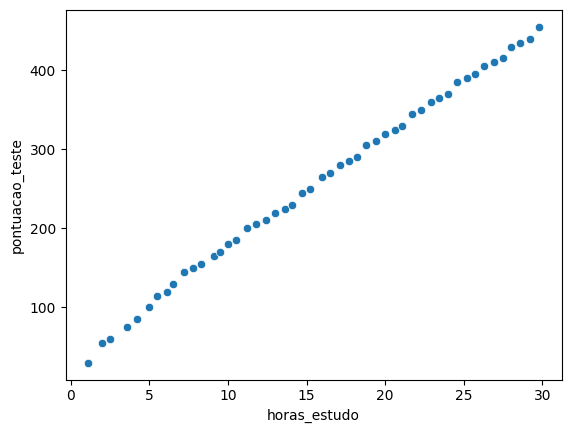

In [11]:
sns.scatterplot(data=df_notas, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

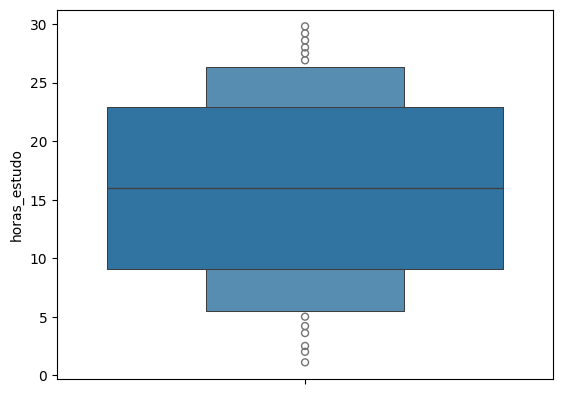

In [12]:
sns.boxenplot(data=df_notas, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

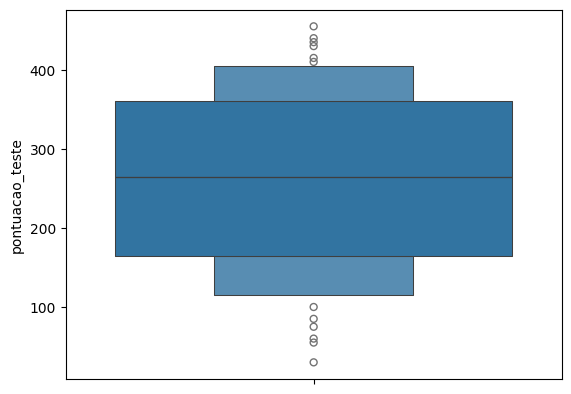

In [13]:
sns.boxenplot(data=df_notas, y='pontuacao_teste')

<Axes: >

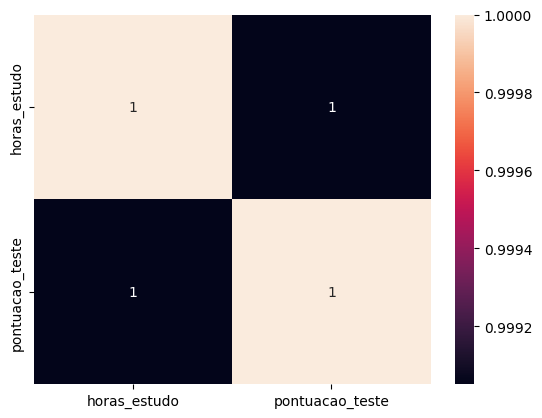

In [15]:
sns.heatmap(df_notas.corr('pearson'), annot=True)

<Axes: >

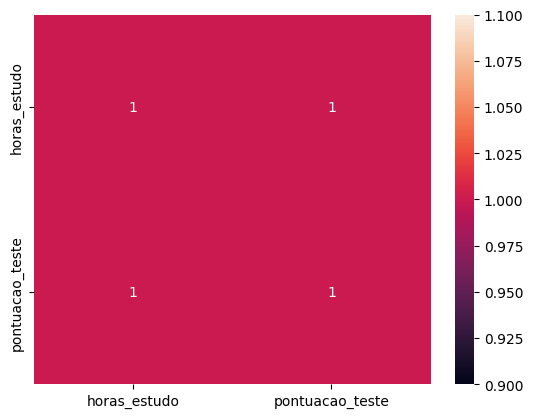

In [16]:
sns.heatmap(df_notas.corr('spearman'), annot=True)

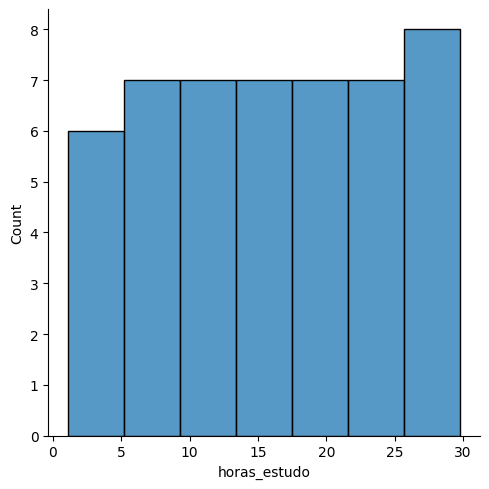

In [17]:
sns.displot(df_notas, x='horas_estudo')

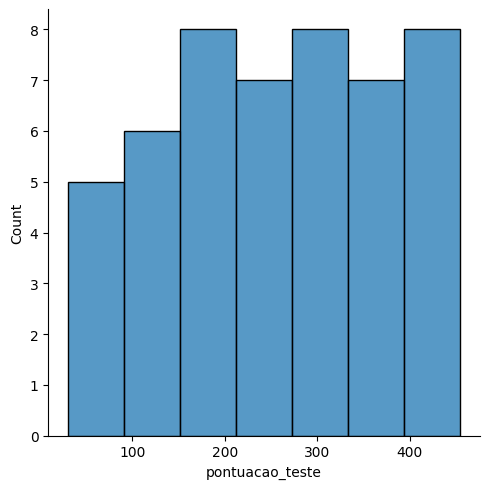

In [18]:
sns.displot(df_notas, x='pontuacao_teste')

In [20]:
X = df_notas['horas_estudo'].values.reshape(-1, 1)
y = df_notas['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [21]:
reg_model = LinearRegression()

In [22]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
print('A equação da reta é y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 14.255721x + 31.488561


In [24]:
reg_model.predict([[30.4]])

array([[464.8624787]])

In [25]:
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(39.87952905939842)

In [27]:
import joblib


joblib.dump(reg_model, 'modelo_regressao.pkl')

['modelo_regressao.pkl']